# Titanic Veriseti Çalışması:

In [1]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Matplotlib ve seaborn için görselleştirme ayarları
plt.style.use('ggplot')
sns.set_palette('pastel')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

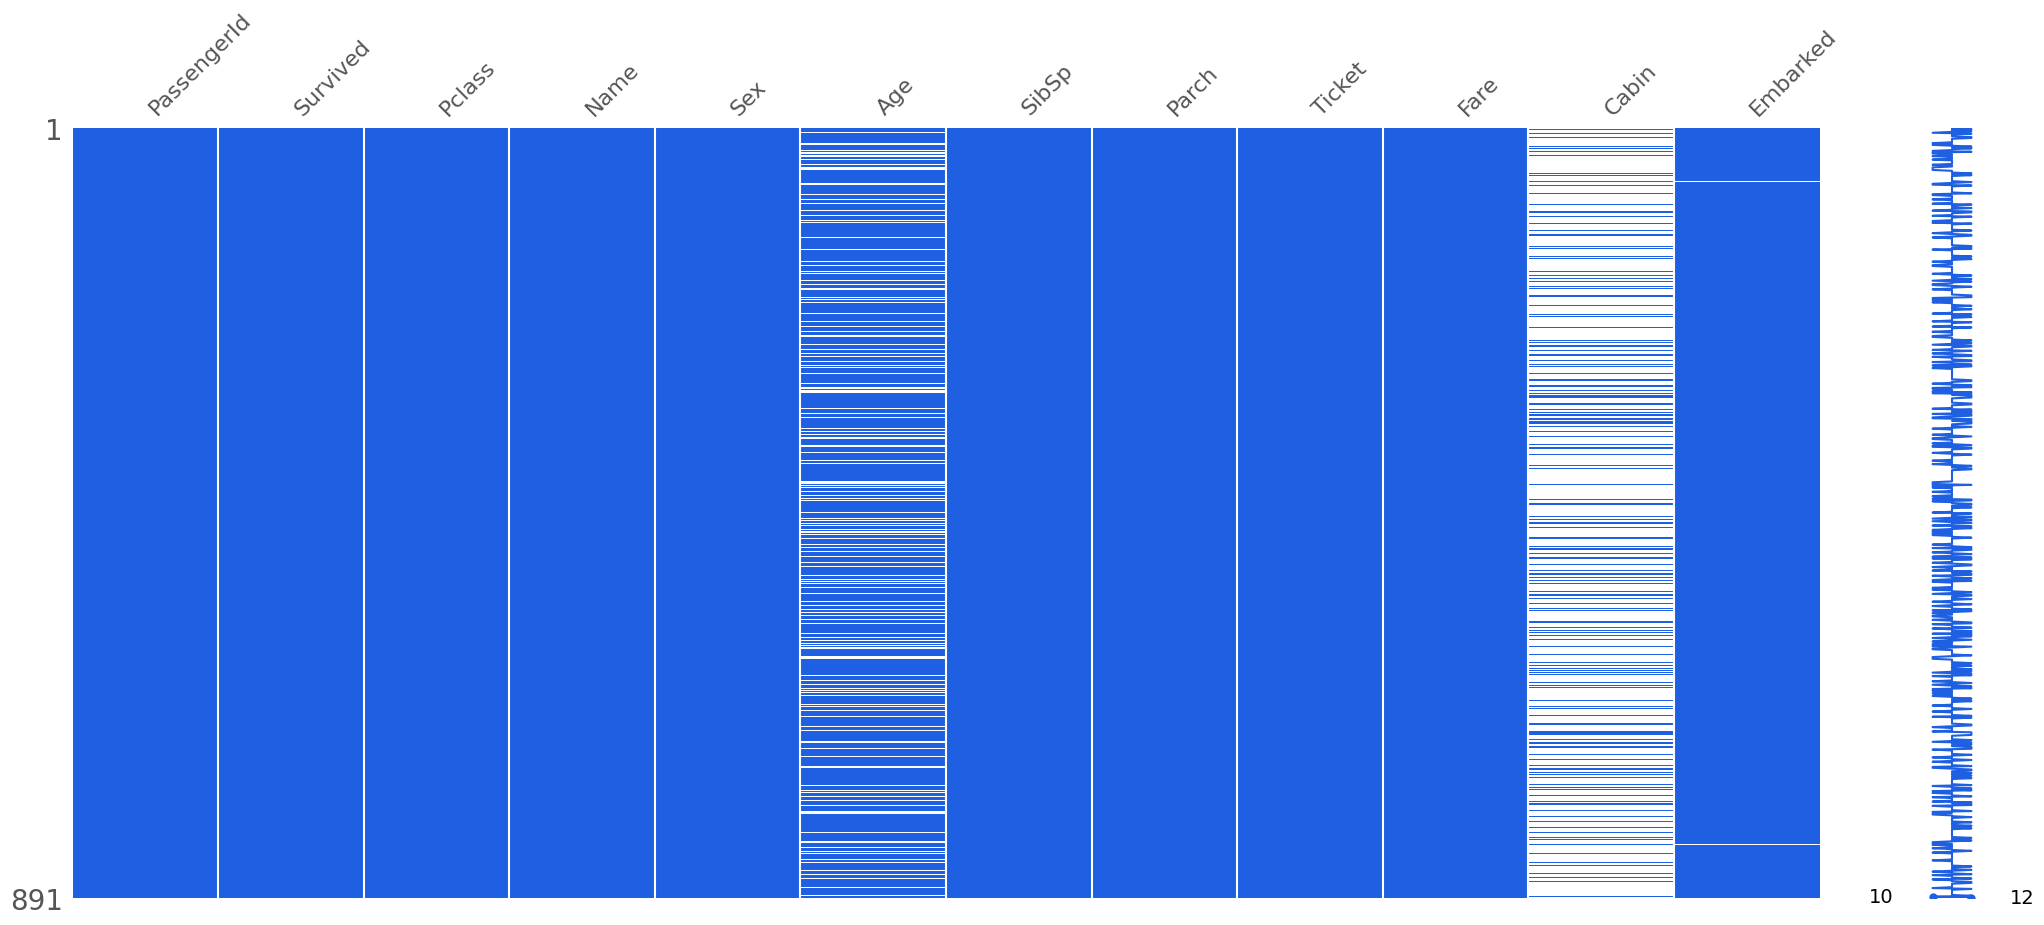

In [2]:
# Veri setinin yüklenmesi
df = pd.read_csv('titanic.csv')
df.head()

# Veri setinin genel özelliklerini inceleyelim
df.info()
df.describe()

# Eksik verilerin sayısını bulmak
df.isnull().sum()
msno.matrix(df, color=(30/255, 96/255, 225/255))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

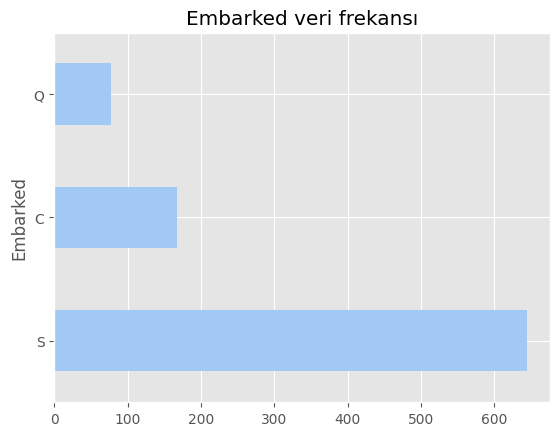

In [3]:
# 'Age' sütunundaki eksik değerleri medyan ile doldurma
if df['Age'].notnull().any():
    df['Age'] = df['Age'].fillna(df['Age'].median()).infer_objects()

# 'Embarked' sütunundaki eksik değerleri en sık değerle doldurma
df.Embarked.value_counts().plot.barh().set_title("Embarked veri frekansı")

if df['Embarked'].notnull().any():
    df["Embarked"] = df["Embarked"].fillna('S').infer_objects()

# Cabin sütunundaki verileri dropladım.
df = df.drop(columns = 'Cabin')

# Eksik değerlerin temizlendiğinden emin olmak
df.isnull().sum()


<Axes: xlabel='Embarked', ylabel='Survived'>

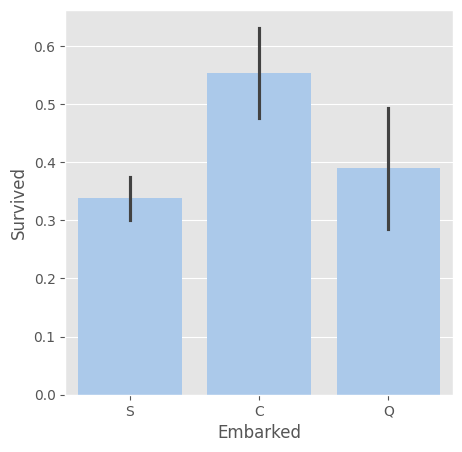

In [4]:
#Embarked ve Survived arasındaki ilişki
plt.figure(figsize = (5,5))
sns.barplot(x= "Embarked" , y= "Survived", data= df)

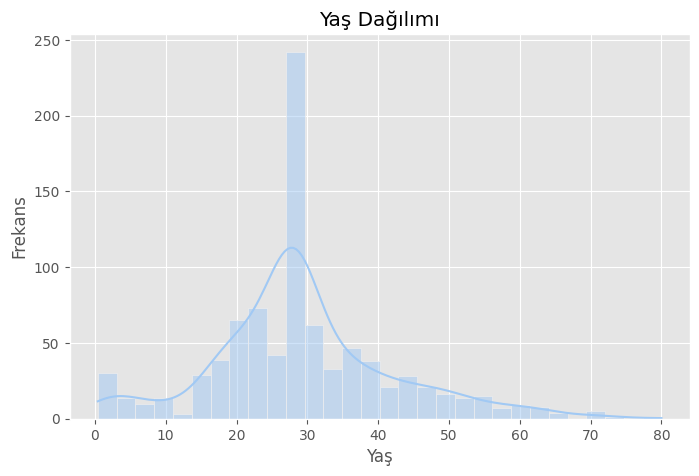

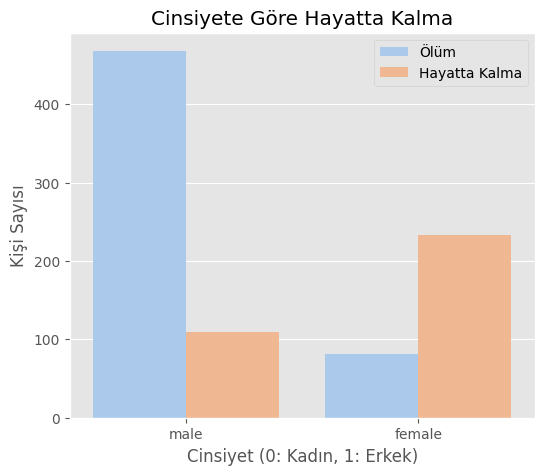

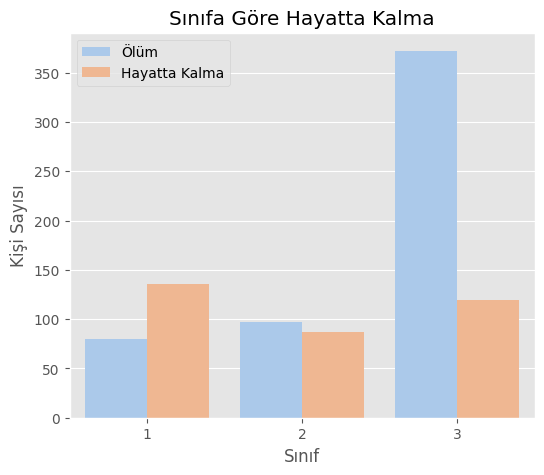

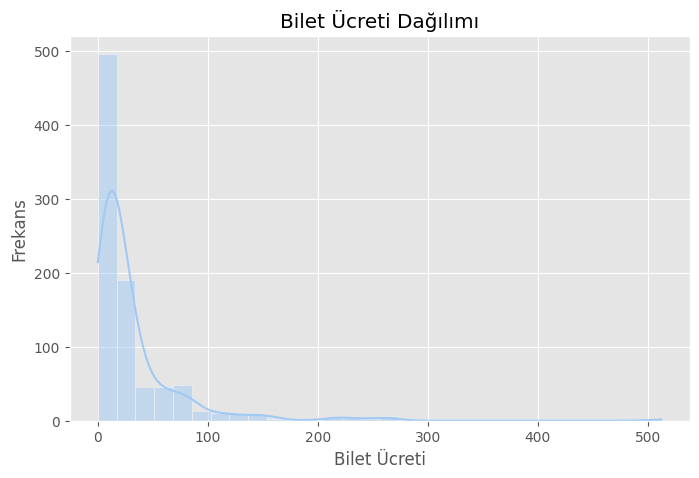

In [5]:
# Yaş dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

# Cinsiyete göre hayatta kalma oranı
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Cinsiyete Göre Hayatta Kalma")
plt.xlabel("Cinsiyet (0: Kadın, 1: Erkek)")
plt.ylabel("Kişi Sayısı")
plt.legend(['Ölüm', 'Hayatta Kalma'])
plt.show()

# Sınıflara göre hayatta kalma oranı
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Sınıfa Göre Hayatta Kalma")
plt.xlabel("Sınıf")
plt.ylabel("Kişi Sayısı")
plt.legend(['Ölüm', 'Hayatta Kalma'])
plt.show()

# Fiyat (Fare) dağılımı
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Bilet Ücreti Dağılımı")
plt.xlabel("Bilet Ücreti")
plt.ylabel("Frekans")
plt.show()


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [7]:
# 'Sex' sütununu sayısal değerlere çevirme (0: kadın, 1: erkek)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# 'Embarked' sütununu one-hot encoding ile dönüştürme
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
# LabelEncoding
df.Ticket = LabelEncoder().fit_transform(df.Ticket)

In [9]:
x = df.drop(columns = ['Survived','PassengerId','Name'])
y = df['Survived']

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Eğitimi

In [11]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print("Doğruluk Skoru:", accuracy)
print("Karışıklık Matrisi:\n", confusion_matrix(y_val, y_pred))

Doğruluk Skoru: 0.8156424581005587
Karışıklık Matrisi:
 [[93 12]
 [21 53]]
